## Dynamic Programming

### Longest Common List

__Question__: Write a function to find the length of the __longest common subsequence__ between two sequences. E.g. Given the strings "serendipitous" and "precipitation", the longest common subsequence is "reipito" and its length is 7.

A "sequence" is a group of items with a deterministic ordering. Lists, tuples and ranges are some common sequence types in Python.

A "subsequence" is a sequence obtained by deleting zero or more elements from another sequence. For example, "edpt" is a subsequence of "serendipitous".

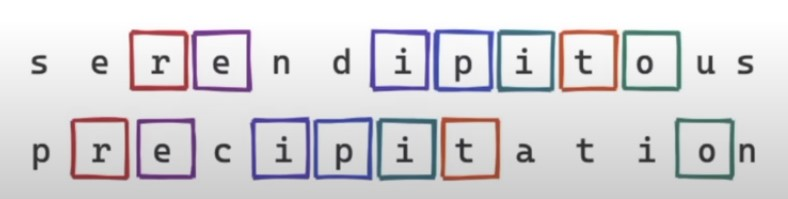

In [6]:
tests = []

tests.append({
    'input': {
        'seq1': 'serendipitous',
        'seq2': 'precipitation'
    },
    'output': 7
})

tests.append({
    'input': {
        'seq1': 'dsrwfcad',
        'seq2': 'juiokmnj'
    },
    'output': 0
})

tests.append({
    'input': {
        'seq1': '',
        'seq2': 'hdimhje'
    },
    'output': 0
})

tests.append({
    'input': {
        'seq1': '',
        'seq2': ''
    },
    'output': 0
})

tests.append({
    'input': {
        'seq1': [2, 5, 1, 6, 8],
        'seq2': [5, 6, 8]
    },
    'output': 3
})

tests.append({
    'input': {
        'seq1': 'contem',
        'seq2': 'contem'
    },
    'output': 6
})

In [9]:
def lcs_recursion(seq1, seq2, idx1=0, idx2=0):
    if idx1 == len(seq1) or idx2 == len(seq2):
        return 0
    elif seq1[idx1] == seq2[idx2]:
        return 1 + lcs_recursion(seq1, seq2, idx1+1, idx2+1)
    else:
        res1 = lcs_recursion(seq1, seq2, idx1+1, idx2)
        res2 = lcs_recursion(seq1, seq2, idx1, idx2+1)
        return max(res1, res2)

In [10]:
for test in tests:
    print(lcs_recursion(**test['input']) == test['output'])

True
True
True
True
True
True


In [11]:
def lcs_memo(seq1, seq2):
    memo = {}
    def recurse(idx1, idx2):
        key = (idx1, idx2)
        if key in memo:
            return memo[key]
        elif idx1 == len(seq1) or idx2 == len(seq2):
            memo[key] = 0
        elif seq1[idx1] == seq2[idx2]:
            memo[key] = 1 + recurse(idx1+1, idx2+1)
        else:
            memo[key] = max(recurse(idx1+1, idx2), recurse(idx1, idx2+1))
        return memo[key]
    return recurse(0, 0)

In [12]:
for test in tests:
    print(lcs_memo(**test['input']) == test['output'])

True
True
True
True
True
True


In [15]:
def lcs_dynamic(seq1, seq2):
    table = [[0 for _ in range(len(seq2) + 1)] for _ in range(len(seq1) + 1)]
    for idx2 in range(len(seq2)):
        for idx1 in range(len(seq1)):
            if seq1[idx1] == seq2[idx2]:
                table[idx1+1][idx2+1] = table[idx1][idx2] + 1
            else:
                table[idx1+1][idx2+1] = max(table[idx1+1][idx2], table[idx1][idx2+1])
    return table[-1][-1]

In [16]:
for test in tests:
    print(lcs_dynamic(**test['input']) == test['output'])

True
True
True
True
True
True


## 0-1 Knapsack Problem

### Problem statement

> You are in charge of selecting a football (soccer) team from a large pool of players. Each player has a cost, and a rating. You have a limited budget. What is the highest total rating of a team that fits within your budget. Assume that there is no minimum or maximum team size

General problem statement

> Given _n_ elements, each of which has a weight and a profit, determine the maximum progit that can be obtained by selecting a subset of the elements weighing no more that _w_.

In [17]:
tests = []

tests.append({
    'input': {
        'capacity': 8,
        'weight': [2, 4, 6, 8],
        'profit': [3, 5, 4, 6]
    },
    'output': 8
})

tests.append({
    'input': {
        'capacity': 4,
        'weight': [8, 9, 10, 11],
        'profit': [2, 4, 5, 3]
    },
    'output': 0
})

tests.append({
    'input': {
        'capacity': 10,
        'weight': [3, 4, 5, 8, 10],
        'profit': [1, 3, 2, 5, 7]
    },
    'output': 7
})

tests.append({
    'input': {
        'capacity': 16,
        'weight': [6, 4, 5, 8, 10],
        'profit': [6, 3, 5, 5, 7]
    },
    'output': 14
})

In [23]:
def max_profit_recursion(capacity, weight, profit, idx=0):
    if idx == len(weight):
        return 0
    elif capacity < weight[idx]:
        return max_profit_recursion(capacity, weight, profit, idx+1)
    else:
        option1 = max_profit_recursion(capacity, weight, profit, idx+1)
        option2 = profit[idx] + max_profit_recursion(capacity - weight[idx], weight, profit, idx+1)
        return max(option1, option2)

In [24]:
for test in tests:
    print(max_profit_recursion(**test['input']))

8
0
7
14


Implement memo solution

In [26]:
def memo_recursive(capacity, weight, profit, idx=0):
    memo = {}
    def recursive(capacity, idx):
        if idx == len(weight):
            return 0
        key = (capacity, idx)
        if key in memo:
            return memo[key]
        elif capacity < weight[idx]:
            memo[key] = recursive(capacity, idx+1)
        else:
            memo[key] = max(recursive(capacity, idx+1), profit[idx] + recursive(capacity - weight[idx], idx+1))
        return memo[key]
    return recursive(capacity, idx)


In [27]:
for test in tests:
    print(memo_recursive(**test['input']) == test['output'])

True
True
True
True


In [30]:
def max_profit_dynamic(capacity, weight, profit, idx=0):
    table = [[0 for _ in range(capacity+1)] for _ in range(len(weight) + 1)]
    for i in range(len(weight)):
        for c in range(1, capacity + 1):
            if c < weight[i]:
                table[i+1][c] = table[i][c]
            else:
                table [i+1][c] = max(table[i][c], profit[i] + table[i][c - weight[i]])
    return table[-1][-1]


In [31]:
for test in tests:
    print(max_profit_dynamic(**test['input']) == test['output'])

True
True
True
True
